## Identify and collect additional training data to replicate Radke et al.'s research paper on wildfire spread. 
### I. ID & read shapefiles/spatial data using Python
### II. use geopandas to merge heterogenous data sources:
1. Historical **polygonal wildfire perimeters** from GEOMAC. [Shapefile here](https://rmgsc.cr.usgs.gov/outgoing/GeoMAC/) For this project, I selected the **'2018_fire_data' > 'California' fires > 'Camp' fire**.
2. Digital **elevation data** (3DEP) from The National Map
USGS NED 1/3 arc-second Contours for Chico W, California 20181001 1 X 1 degree. [Shapefile here](https://www.sciencebase.gov/catalog/item/5a68b45be4b06e28e9c7056f)

In [1]:
import geopandas as gpd

In [2]:
import pandas as pd
import zipfile
import os

def un_zipFiles(path):
    ''' Function definition to unzip files
    '''
    files=os.listdir(path)
    for file in files:
        if file.endswith('.zip'):
            filePath=path+'/'+file
            zip_file = zipfile.ZipFile(filePath)
            for names in zip_file.namelist():
                zip_file.extract(names,path)
            zip_file.close() 

In [5]:
#unzip historical fire perimeter polygons

un_zipFiles('./historical_fire_perimeters')

In [3]:
#Read Shapefiles and create GeoDataFrame of historical fire perimeters

file = os.listdir('./historical_fire_perimeters')
path = [os.path.join('./historical_fire_perimeters', i) for i in file if ".shp" in i]

gdf = gpd.GeoDataFrame(pd.concat([gpd.read_file(i) for i in path], 
                        ignore_index=True), crs=gpd.read_file(path[0]).crs)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [4]:
gdf['geometry']

0     POLYGON ((-121.75498 39.70421, -121.75546 39.7...
1     MULTIPOLYGON (((-121.65259 39.60843, -121.6525...
2     MULTIPOLYGON (((-121.65260 39.60724, -121.6526...
3     MULTIPOLYGON (((-121.50531 39.66610, -121.5052...
4     MULTIPOLYGON (((-121.65258 39.60844, -121.6525...
5     MULTIPOLYGON (((-121.50531 39.66610, -121.5052...
6     MULTIPOLYGON (((-121.65260 39.60724, -121.6526...
7     MULTIPOLYGON (((-121.65260 39.60724, -121.6526...
8     MULTIPOLYGON (((-121.50531 39.66610, -121.5052...
9     MULTIPOLYGON (((-121.65260 39.60724, -121.6526...
10    MULTIPOLYGON (((-121.51302 39.64757, -121.5130...
11    MULTIPOLYGON (((-121.65260 39.60724, -121.6526...
12    MULTIPOLYGON (((-121.61493 39.66025, -121.6149...
13    POLYGON ((-121.55830 39.85986, -121.55815 39.8...
14    MULTIPOLYGON (((-121.65260 39.60724, -121.6526...
15    MULTIPOLYGON (((-121.61454 39.66041, -121.6152...
16    MULTIPOLYGON (((-121.51063 39.64221, -121.5106...
17    MULTIPOLYGON (((-121.65260 39.60724, -121.

In [5]:
# this code also works! 'geometry' feature is hidden, however.

# import sys
# from pathlib import Path   

# folder = Path('./historical_fire_perimeters')

# gdf = pd.concat([
#     gpd.read_file(shp)
#     for shp in folder.glob('*.shp')
# ]).pipe(gpd.GeoDataFrame)

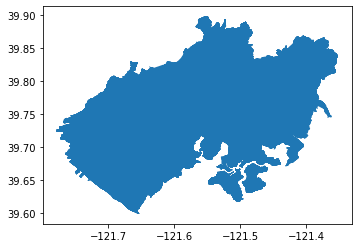

In [29]:
import matplotlib.pyplot as plt
!pip install descartes

gdf.plot();

In [42]:
gdf.iloc[]

ComplexNm                                                  None
GISACRES                                                 151515
OBJECTID                                                    NaN
SHAPE_Area                                                  NaN
active                                                        Y
agency                                                      CDF
comments                                                   None
compParID                                                  None
compfirecd                                                 None
dateCrnt                                             2018-11-20
fireName                                                   CAMP
fireNum                                                  016737
fireYear                                                   2018
firecode                                                   L6BH
geometry      (POLYGON ((-121.6525991971002 39.6072365619416...
inComplex                               

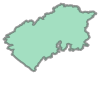

In [39]:
gdf['geometry'].iloc[0]

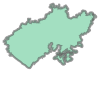

In [38]:
gdf['geometry'].iloc[3]

In [51]:
gdf = gdf.sort_values('GISACRES')

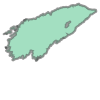

In [52]:
gdf['geometry'].iloc[0]

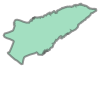

In [53]:
gdf['geometry'].iloc[1]

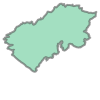

In [57]:
gdf['geometry'].iloc[2]

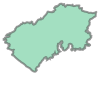

In [65]:
gdf['geometry'].iloc[4]

In [111]:
for i in range(len(gdf)):
    gdf.plot

In [78]:
gdf.dtypes

ComplexNm       object
GISACRES       float64
OBJECTID       float64
SHAPE_Area     float64
active          object
agency          object
comments        object
compParID       object
compfirecd      object
dateCrnt        object
fireName        object
fireNum         object
fireYear        object
firecode        object
geometry      geometry
inComplex       object
incidentID      object
inciwebId       object
irwinid         object
latest          object
mapmethod       object
mergeid         object
perDatTime      object
state           object
unitIDOwn       object
unitIDProt      object
dtype: object

In [20]:
# unzip elevation data 
un_zipFiles('./digital_elevation_data')

In [7]:
#Read elevation data(Shapefile)
elevation = gpd.read_file('./digital_elevation_data/Shape/Elev_Contour.shp')

In [21]:
elevation.head()

,OBJECTID,Permanent_,Source_Fea,Source_Dat,Source_D_1,Source_Ori,Data_Secur,Distributi,LoadDate,FCode,ContourEle,ContourUni,ContourInt,NEDResolut,Cell_ID,Shape_Leng,geometry
0,1,b602ebaf-4ba4-46a9-842b-8d9e7813458d,None,8489b4de-ecf7-4aa1-977e-4b5ce8b362ab,Contours derived from the National Elevation D...,US Geological Survey,5,E4,2018-09-06,10102,2900.0,1,20.0,10.0,36872,0.060765,"LINESTRING Z (-121.31556 39.50000 0.00000, -12..."
1,2,e421cef1-9de0-4063-ab2f-f13583438f19,None,2936d811-f2ab-4800-9006-b7e600894971,Contours derived from the National Elevation D...,US Geological Survey,5,E4,2018-09-06,10101,5040.0,1,20.0,10.0,7497,0.005447,"LINESTRING Z (-121.14192 39.74544 0.00000, -12..."
2,3,80561e72-c882-498d-9c41-f721b1a27f68,None,e727bb9f-259f-4e1e-8422-ba251677ff8d,Contours derived from the National Elevation D...,US Geological Survey,5,E4,2018-09-06,10102,2500.0,1,20.0,10.0,70237,0.015615,"LINESTRING Z (-121.07771 39.21145 0.00000, -12..."
3,4,c8da074c-5570-4e6a-b443-4379a0eaa9a4,None,56ffbd02-9832-4b90-b9f7-936d0be52a73,Contours derived from the National Elevation D...,US Geological Survey,5,E4,2018-09-06,10102,1300.0,1,20.0,10.0,49633,0.004451,"LINESTRING Z (-121.17650 39.00000 0.00000, -12..."
4,5,c00f8f09-0e31-489f-865f-07d0669cdbdf,None,0fb57a3f-2fb7-45cf-b6c8-9cc117952818,Contours derived from the National Elevation D...,US Geological Survey,5,E4,2018-09-06,10101,3520.0,1,40.0,10.0,43241,0.008897,"LINESTRING Z (-121.53812 39.89761 0.00000, -12..."


In [9]:
elevation['geometry']

0        LINESTRING Z (-121.31556 39.50000 0.00000, -12...
1        LINESTRING Z (-121.14192 39.74544 0.00000, -12...
2        LINESTRING Z (-121.07771 39.21145 0.00000, -12...
3        LINESTRING Z (-121.17650 39.00000 0.00000, -12...
4        LINESTRING Z (-121.53812 39.89761 0.00000, -12...
                               ...                        
29946    MULTILINESTRING Z ((-121.73110 39.87500 0.0000...
29947    MULTILINESTRING Z ((-121.88439 40.00000 0.0000...
29948    LINESTRING Z (-121.25000 39.73862 0.00000, -12...
29949    LINESTRING Z (-121.02340 39.78998 0.00000, -12...
29950    LINESTRING Z (-121.95911 39.75288 0.00000, -12...
Name: geometry, Length: 29951, dtype: geometry

In [10]:
df = gpd.sjoin(gdf, elevation, how='inner', op='intersects')

//anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


In [12]:
df.head()

,ComplexNm,GISACRES,OBJECTID_left,SHAPE_Area,active,agency,comments,compParID,compfirecd,dateCrnt,...,Data_Secur,Distributi,LoadDate,FCode,ContourEle,ContourUni,ContourInt,NEDResolut,Cell_ID,Shape_Leng
0,None,114866.207880,NaN,NaN,Y,CDF,None,None,None,2018-11-11,...,5,E4,2018-09-06,10101,3760.0,1,40.0,10.0,34159,0.003608
1,None,128816.409733,NaN,NaN,N,CDF,Topology fixed,None,None,2018-11-13,...,5,E4,2018-09-06,10101,3760.0,1,40.0,10.0,34159,0.003608
2,None,148238.313415,NaN,NaN,Y,CDF,None,None,None,2018-11-17,...,5,E4,2018-09-06,10101,3760.0,1,40.0,10.0,34159,0.003608
3,None,151575.190501,NaN,NaN,Y,CDF,None,None,None,2018-11-16,...,5,E4,2018-09-06,10101,3760.0,1,40.0,10.0,34159,0.003608
4,None,136635.531759,NaN,NaN,N,CDF,None,None,None,2018-11-14,...,5,E4,2018-09-06,10101,3760.0,1,40.0,10.0,34159,0.003608


In [14]:
# this line ran forever, but I wanted to verify that for every unique fire perimeter there
# are multiple elevation values, which makes sense since a single, polygonal perimeter is expected to cover a range of elevations
df['geometry'].nunique()

27